In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
import math


In [ ]:
df=pd.read_csv("/content/HINDALCO.csv")
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,HINDALC0,EQ,813.45,851.00,878.50,851.0,869.0,867.45,869.86,33799,2.940055e+12,NaN,NaN,NaN
1,2000-01-04,HINDALC0,EQ,867.45,879.00,930.00,870.0,900.0,900.35,903.51,70944,6.409848e+12,NaN,NaN,NaN
2,2000-01-05,HINDALC0,EQ,900.35,835.00,972.40,835.0,972.4,972.35,949.32,153030,1.452744e+13,NaN,NaN,NaN
3,2000-01-06,HINDALC0,EQ,972.35,1050.15,1050.15,1015.1,1045.0,1048.45,1047.08,129708,1.358144e+13,NaN,NaN,NaN
4,2000-01-07,HINDALC0,EQ,1048.45,1096.00,1120.00,1015.0,1086.0,1094.95,1085.24,138829,1.506623e+13,NaN,NaN,NaN


In [ ]:
df.drop([ 'High',	'Low',	'Last','Symbol','Series',	'Prev Close','VWAP',	'Volume',	'Turnover'	], axis=1, inplace=True)
df.drop(['Trades',	'Deliverable Volume'	,'%Deliverble'], axis=1, inplace=True)

In [ ]:
df

,Date,Open,Close
0,2000-01-03,851.00,867.45
1,2000-01-04,879.00,900.35
2,2000-01-05,835.00,972.35
3,2000-01-06,1050.15,1048.45
4,2000-01-07,1096.00,1094.95
...,...,...,...
5301,2021-04-26,353.00,348.35
5302,2021-04-27,350.10,366.25
5303,2021-04-28,368.85,362.60
5304,2021-04-29,367.40,372.15


In [ ]:
#data=df.filter(['close'])
#dataset=data.values
#dataset

data = df[['Date', 'Close']]

data['Close']


0        867.45
1        900.35
2        972.35
3       1048.45
4       1094.95
         ...   
5301     348.35
5302     366.25
5303     362.60
5304     372.15
5305     364.40
Name: Close, Length: 5306, dtype: float64

then use min max scaler

In [ ]:
# Preprocess the data
scaler = MinMaxScaler()
data['Close'] = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

<ipython-input-6-878edba8a1ae>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Close'] = scaler.fit_transform(data['Close'].values.reshape(-1, 1))


In [ ]:
data['Close']

0       0.578351
1       0.601275
2       0.651442
3       0.704466
4       0.736866
          ...   
5301    0.216660
5302    0.229132
5303    0.226589
5304    0.233243
5305    0.227843
Name: Close, Length: 5306, dtype: float64

In [ ]:
# Create a function to prepare the data
def prepare_data(data, look_back=60):
    X, Y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:i+look_back])
        Y.append(data[i+look_back])
    return np.array(X), np.array(Y)

look_back = 60
X, Y = prepare_data(data['Close'], look_back)

In [ ]:
len(X)

5246

In [ ]:
# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
Y_train, Y_test = Y[:train_size], Y[train_size:]


In [ ]:
len(X_train)

4196

In [ ]:
# Create the RNN model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, Y_train, batch_size=32, epochs=12)

Epoch 1/12
132/132 [==============================] - 10s 8ms/step - loss: 0.0054
Epoch 2/12
132/132 [==============================] - 1s 8ms/step - loss: 0.0012
Epoch 3/12
132/132 [==============================] - 1s 8ms/step - loss: 0.0011
Epoch 4/12
132/132 [==============================] - 1s 8ms/step - loss: 8.4237e-04
Epoch 5/12
132/132 [==============================] - 1s 8ms/step - loss: 7.1873e-04
Epoch 6/12
132/132 [==============================] - 1s 8ms/step - loss: 6.9147e-04
Epoch 7/12
132/132 [==============================] - 1s 8ms/step - loss: 5.6568e-04
Epoch 8/12
132/132 [==============================] - 1s 8ms/step - loss: 5.2083e-04
Epoch 9/12
132/132 [==============================] - 1s 8ms/step - loss: 5.3349e-04
Epoch 10/12
132/132 [==============================] - 1s 11ms/step - loss: 4.4834e-04
Epoch 11/12
132/132 [==============================] - 2s 12ms/step - loss: 4.4712e-04
Epoch 12/12
132/132 [==============================] - 1s 10ms/step - lo

In [ ]:
# Make predictions
import matplotlib.pyplot as plt
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)


33/33 [==============================] - 1s 4ms/step


In [ ]:
len(predictions)

1050

In [ ]:
train = data[:train_size]
train

,Date,Close
0,2000-01-03,0.578351
1,2000-01-04,0.601275
2,2000-01-05,0.651442
3,2000-01-06,0.704466
4,2000-01-07,0.736866
...,...,...
4191,2016-10-30,0.078282
4192,2016-11-01,0.083298
4193,2016-11-02,0.082985
4194,2016-11-03,0.087375


In [ ]:
valid = data[train_size:5246]
valid


,Date,Close
4196,2016-11-07,0.090719
4197,2016-11-08,0.090580
4198,2016-11-09,0.086887
4199,2016-11-10,0.096398
4200,2016-11-11,0.093994
...,...,...
5241,2021-01-22,0.140608
5242,2021-01-25,0.141374
5243,2021-01-27,0.135173
5244,2021-01-28,0.133535


In [ ]:
valid['Predictions'] = predictions

<ipython-input-18-051906f0b5db>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


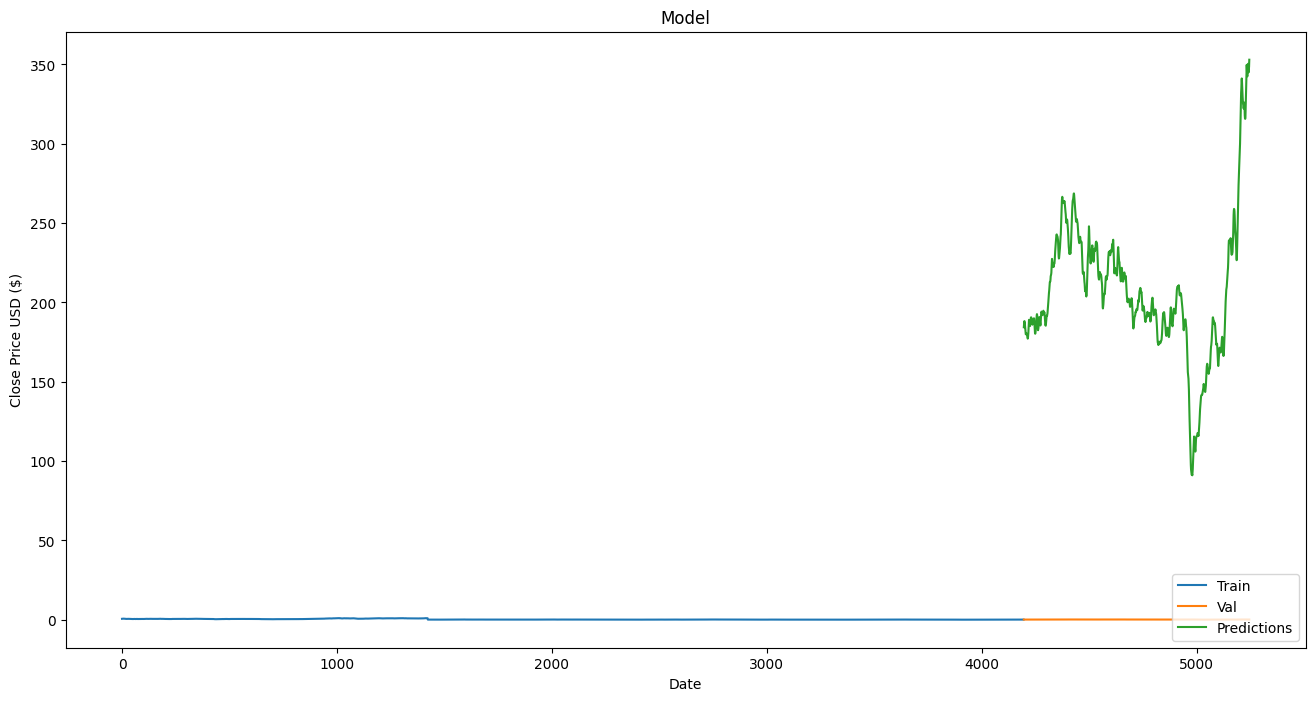

In [ ]:

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()